In [473]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import tight_layout

In [474]:
def count_whole(data, rectangle_range):
    '''
    Takes an area and search for every data that fits within that area, data has x,y coordinates.
    Calculates the number of points inside the area for front and back draws.
    This function will take the whole body picture, to have the total amount of points for the front and
    for the back
    :param data: target data
    :param rectangle_range: target rectangle range
    :return: f = points on the front (whole picture) ; b = points on the back (whole picture)
    '''
    f = []
    b = []

    target_data = data

    x = rectangle_range['x']
    y = rectangle_range['y']
    w = rectangle_range['w']
    h = rectangle_range['h']

    for i in range(0, len(target_data)):
        if x <= target_data.iloc[i, 3] < x + w and y <= target_data.iloc[i, 2] < y + h:
            f.append([int(target_data.iloc[i, 3]), int(target_data.iloc[i, 2])])

    for i in range(0, len(target_data)):
        b.append([int(target_data.iloc[i, 3]), int(target_data.iloc[i, 2])])

    f = len(f)
    b = len(b)

    b = abs(f - b)
    return f, b

In [475]:
def count_inside(data, rectangle_range):
    '''
    Takes an area and search for every data that fits within that area, data has x,y coordinates.
    Calculates the number of points inside the area for front and back draws
    :param data: target data
    :param rectangle_range: target rectangle range
    :return: f = points on the front ; b = points on the back
    '''
    f = []
    b = []

    target_data = data

    x = rectangle_range.loc[rectangle_range['location'] == 'front', 'x'].to_numpy()
    y = rectangle_range.loc[rectangle_range['location'] == 'front', 'y'].to_numpy()
    w = rectangle_range.loc[rectangle_range['location'] == 'front', 'w'].to_numpy()
    h = rectangle_range.loc[rectangle_range['location'] == 'front', 'h'].to_numpy()

    for i in range(0, len(target_data)):
        if x <= target_data.iloc[i, 3] < x + w and y <= target_data.iloc[i, 2] < y + h:
            f.append([int(target_data.iloc[i, 3]), int(target_data.iloc[i, 2])])

    x = rectangle_range.loc[rectangle_range['location'] == 'back', 'x'].to_numpy()
    y = rectangle_range.loc[rectangle_range['location'] == 'back', 'y'].to_numpy()
    w = rectangle_range.loc[rectangle_range['location'] == 'back', 'w'].to_numpy()
    h = rectangle_range.loc[rectangle_range['location'] == 'back', 'h'].to_numpy()

    for i in range(0, len(target_data)):
        if x <= target_data.iloc[i, 3] < x + w and y <= target_data.iloc[i, 2] < y + h:
            b.append([int(target_data.iloc[i, 3]), int(target_data.iloc[i, 2])])

    return f, b

In [476]:

def truncate(number, digits) -> float:
    '''
    Function by https://stackoverflow.com/users/541420/erwin-mayer
    :param number: input number
    :param digits: target decimals to be left
    :return: float number with target decimals
    '''
    # Improve accuracy with floating point operations, to avoid truncate(16.4, 2) = 16.39 or truncate(-1.13, 2) = -1.12
    nbDecimals = len(str(number).split('.')[1])
    if nbDecimals <= digits:
        return number
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

In [477]:
def sort_and_export(a, b, c):
    data_sorted = pd.DataFrame()

    titles = ['Females (Self)', 'Males (Self)', 'Females (Others)', 'Males (Others)']
    for i, sex in enumerate(a):

        print("Working on", titles[i])

        for segment in c:
            print("Working on", segment)
            rectangle = b.set_index('segment').loc[segment, ['location', 'x', 'y', 'w', 'h']]

            x1 = rectangle.loc[rectangle['location'] == "front", 'x'].to_numpy()
            y1 = rectangle.loc[rectangle['location'] == "front", 'y'].to_numpy()
            w1 = rectangle.loc[rectangle['location'] == "front", 'w'].to_numpy()
            h1 = rectangle.loc[rectangle['location'] == "front", 'h'].to_numpy()

            x2 = rectangle.loc[rectangle['location'] == "back", 'x'].to_numpy()
            y2 = rectangle.loc[rectangle['location'] == "back", 'y'].to_numpy()
            w2 = rectangle.loc[rectangle['location'] == "back", 'w'].to_numpy()
            h2 = rectangle.loc[rectangle['location'] == "back", 'h'].to_numpy()

            if segment == "r_armpit" or segment == "l_armpit":
                segment = "armpit"
            if segment == "r_hand" or segment == "l_hand":
                segment = "hand"
            if segment == "r_knee" or segment == "l_knee":
                segment = "knee"
            if segment == "r_foot" or segment == "l_foot":
                segment = "feet"

            for j in range(0, len(sex)):
                if "(Self)" in titles[i]:
                    if x1 <= sex.iloc[j, 3] < x1 + w1 and y1 <= sex.iloc[j, 2] < y1 + h1:
                        sex.loc[(sex['self_x'] == sex.iloc[j, 3]) & (sex['self_y'] == sex.iloc[j, 2]), ['segment']] = [
                            segment]
                        sex.loc[(sex['self_x'] == sex.iloc[j, 3]) & (sex['self_y'] == sex.iloc[j, 2]), ['location']] = [
                            "front"]
                        sex.loc[(sex['self_x'] == sex.iloc[j, 3]) & (sex['self_y'] == sex.iloc[j, 2]), ['type']] = [
                            "self"]

                    if x2 <= sex.iloc[j, 3] < x2 + w2 and y2 <= sex.iloc[j, 2] < y2 + h2:
                        sex.loc[(sex['self_x'] == sex.iloc[j, 3]) & (sex['self_y'] == sex.iloc[j, 2]), ['segment']] = [
                            segment]
                        sex.loc[(sex['self_x'] == sex.iloc[j, 3]) & (sex['self_y'] == sex.iloc[j, 2]), ['type']] = [
                            "self"]
                        sex.loc[(sex['self_x'] == sex.iloc[j, 3]) & (sex['self_y'] == sex.iloc[j, 2]), ['location']] = [
                            "back"]

                elif "(Others)" in titles[i]:
                    if x1 <= sex.iloc[j, 3] < x1 + w1 and y1 <= sex.iloc[j, 2] < y1 + h1:
                        sex.loc[
                            (sex['other_x'] == sex.iloc[j, 3]) & (sex['other_y'] == sex.iloc[j, 2]), ['segment']] = [
                            segment]
                        sex.loc[(sex['other_x'] == sex.iloc[j, 3]) & (sex['other_y'] == sex.iloc[j, 2]), ['type']] = [
                            "other"]
                        sex.loc[
                            (sex['other_x'] == sex.iloc[j, 3]) & (sex['other_y'] == sex.iloc[j, 2]), ['location']] = [
                            "front"]

                    if x2 <= sex.iloc[j, 3] < x2 + w2 and y2 <= sex.iloc[j, 2] < y2 + h2:
                        sex.loc[
                            (sex['other_x'] == sex.iloc[j, 3]) & (sex['other_y'] == sex.iloc[j, 2]), ['segment']] = [
                            segment]
                        sex.loc[(sex['other_x'] == sex.iloc[j, 3]) & (sex['other_y'] == sex.iloc[j, 2]), ['type']] = [
                            "other"]
                        sex.loc[
                            (sex['other_x'] == sex.iloc[j, 3]) & (sex['other_y'] == sex.iloc[j, 2]), ['location']] = [
                            "back"]

        duplicate_counts = (
            sex.groupby(['id', 'segment', 'location'])
            .size()
            .reset_index(name='points')
        )

        info_df = sex[['id', 'gender', 'segment', 'location', 'type']].drop_duplicates()

        result_df = pd.merge(duplicate_counts, info_df, on=['id', 'segment', 'location'], how='left')
        result_df = result_df[['id', 'points', 'gender', 'segment', 'location', 'type']]

        data_sorted = pd.concat([data_sorted, result_df], ignore_index=True)

    data_sorted.to_excel("output/data_sorted2.xlsx")

In [478]:
def plot_sex(a, b, c, d):
    """
    Take both self and others data and plot the results of how many points are within a Region of Interest (ROI).
    The results are plotted in terms of percentages and are separated by gender (female/male) and type (self/others)
    It also takes the segments DataFrame and add new columns, such as 'points' (number of points counted on each
    segment), 'gender' and 'type' to further analysis.
    :param a: 'self' data
    :param b: 'others' data
    :param c: name of segments
    :param d: body silhouette to plot
    :return: Nothing
    """

    titles = ['Females (Self)', 'Males (Self)', 'Females (Others)', 'Males (Others)']
    gender_map = {0: 'female', 1: 'male', 2: 'female', 3: 'male'}
    type_map = {0: 'self', 1: 'self', 2: 'other', 3: 'other'}

    # Copy to avoid changing original data
    segments_df = b.copy()

    # We'll prepare two separate figures: one for points, one for percentage
    fig_points, axes_points = plt.subplots(2, 2, figsize=(12, 10))
    fig_percentage, axes_percentage = plt.subplots(2, 2, figsize=(12, 10))
    axes_points = axes_points.flatten()
    axes_percentage = axes_percentage.flatten()

    for i, data in enumerate(a):
        print('Processing:', titles[i])

        front_rect = segments_df.set_index('segment').loc['front_side', ['location', 'x', 'y', 'w', 'h']]
        whole_front, whole_back = count_whole(data, front_rect)

        for seg in c:
            rect = segments_df.set_index('segment').loc[seg, ['location', 'x', 'y', 'w', 'h']]
            front_points, back_points = count_inside(data, rect)

            front_count, back_count = len(front_points), len(back_points)
            front_pct = round(front_count * 100 / whole_front, 2) if whole_front else 0
            back_pct = round(back_count * 100 / whole_back, 2) if whole_back else 0

            for loc, count, pct in [('front', front_count, front_pct), ('back', back_count, back_pct)]:
                mask = (segments_df['segment'] == seg) & (segments_df['location'] == loc)
                segments_df.loc[mask, 'points'] = count
                segments_df.loc[mask, 'percentage'] = pct

            segments_df.loc[segments_df['segment'] == seg, 'gender'] = gender_map[i]
            segments_df.loc[segments_df['segment'] == seg, 'type'] = type_map[i]

        # Sum paired segments for both metrics
        segments_df = _sum_paired_segments(segments_df, ['armpit', 'hand', 'knee', 'foot'], target='points')
        segments_df = _sum_paired_segments(segments_df, ['armpit', 'hand', 'knee', 'foot'], target='percentage')

        # Data for points plot
        plot_points = segments_df[segments_df['points'].notna()].copy()
        plot_points['points'] = plot_points['points'].astype(int)
        plot_points['colors'] = '#00DBFF'  # default blue
        max_front_points = plot_points.iloc[:len(segments)]['points'].max()
        max_back_points = plot_points.iloc[len(segments):]['points'].max()
        min_nonzero_points = plot_points.loc[plot_points['points'] != 0, 'points'].min()
        plot_points.loc[plot_points['points'] == max_front_points, 'colors'] = '#FF2400'
        plot_points.loc[plot_points['points'] == max_back_points, 'colors'] = '#FF2400'
        plot_points.loc[plot_points['points'] == min_nonzero_points, 'colors'] = '#FFD700'

        # Data for percentage plot
        plot_percentage = segments_df[segments_df['percentage'].notna()].copy()
        plot_percentage['colors'] = '#00DBFF'  # default blue
        max_front_pct = plot_percentage.iloc[:len(segments)]['percentage'].max()
        max_back_pct = plot_percentage.iloc[len(segments):]['percentage'].max()
        min_nonzero_pct = plot_percentage.loc[plot_percentage['percentage'] != 0, 'percentage'].min()
        plot_percentage.loc[plot_percentage['percentage'] == max_front_pct, 'colors'] = '#FF2400'
        plot_percentage.loc[plot_percentage['percentage'] == max_back_pct, 'colors'] = '#FF2400'
        plot_percentage.loc[plot_percentage['percentage'] == min_nonzero_pct, 'colors'] = '#FFD700'

        # Plot points
        ax_p = axes_points[i]
        sns.scatterplot(data=plot_points, x='xc', y='yc', size='points',
                        sizes=(250, 1000), legend=False, ax=ax_p,
                        hue='colors', alpha=0.5)

        for idx, row in plot_points.iterrows():
            ax_p.text(row['xc'], row['yc'], str(row['points']), ha='center')

        ax_p.imshow(d)
        ax_p.invert_yaxis()
        ax_p.invert_xaxis()
        ax_p.set_xlim(ax_p.get_xlim()[::-1])
        ax_p.set_ylim(ax_p.get_ylim()[::-1])
        ax_p.axis('off')
        ax_p.set_title(f"{titles[i]} - Points")

        # Plot percentage
        ax_pct = axes_percentage[i]
        sns.scatterplot(data=plot_percentage, x='xc', y='yc', size='percentage',
                        sizes=(250, 1000), legend=False, ax=ax_pct,
                        hue='colors', alpha=0.5)

        for idx, row in plot_percentage.iterrows():
            ax_pct.text(row['xc'], row['yc'], f"{row['percentage']:.2f}", ha='center')

        ax_pct.imshow(d)
        ax_pct.invert_yaxis()
        ax_pct.invert_xaxis()
        ax_pct.set_xlim(ax_pct.get_xlim()[::-1])
        ax_pct.set_ylim(ax_pct.get_ylim()[::-1])
        ax_pct.axis('off')
        ax_pct.set_title(f"{titles[i]} - Percentage")

    plt.tight_layout()
    fig_points.savefig('output/gender_by_points.png', dpi=300)
    fig_percentage.savefig('output/gender_by_percentage.png', dpi=300)

def _sum_paired_segments(df, segment_types, target='points'):
    """
    Sum right and left paired segments into right segment and set left segment values to 0 for given target column.
    """
    for seg_type in segment_types:
        for loc in ['front', 'back']:
            right_seg = f'r_{seg_type}'
            left_seg = f'l_{seg_type}'

            mask_right = (df['segment'] == right_seg) & (df['location'] == loc)
            mask_left = (df['segment'] == left_seg) & (df['location'] == loc)

            total = df.loc[mask_right | mask_left, target].sum()
            df.loc[mask_right, target] = round(total, 2)
            df.loc[mask_left, target] = 0
    return df


In [479]:
# Load data from questionnaire
questionnaire = pd.read_excel('source/data/smell_behavior_sociodemographics.xlsx')

# Load self and other body odor dataframes
self = pd.read_excel('source/data/body_silhouettes_self.xlsx')
other = pd.read_excel('source/data/body_silhouettes_other.xlsx')

In [480]:
# Extract valid entries (id) from cleaned questionnaire dataframe and filter for valid entries
included = questionnaire['id'].unique()
self = self[self['id'].isin(included)]
other = other[other['id'].isin(included)]

# Let's create DataFrames for gender-oriented analysis
self_sex = self
self_sex = self_sex.merge(questionnaire[['id', 'gender']], on='id', how='left')

other_sex = other
other_sex = other_sex.merge(questionnaire[['id', 'gender']], on='id', how='left')

In [481]:
# Load body segments and image
segments = pd.read_excel('source/data/body_segments.xlsx')
segments_names = ['hair', 'mouth', 'neck', 'chest', 'r_armpit', 'r_hand', 'l_armpit',
'l_hand', 'pelvis', 'r_knee', 'r_foot', 'l_knee', 'l_foot']

map_img = mpimg.imread('source/img/humanbody_clear.png')

colors = ['#FF6B6B', '#FFA94D', '#FFD43B', '#69DB7C', '#38D9A9', '#4DABF7', '#5C7CFA',
'#9775FA', '#DA77F2', '#F783AC', '#ADB5BD', '#343A40', '#FFC9E3', '#B2F2BB']

Processing: Females (Self)
Processing: Males (Self)
Processing: Females (Others)
Processing: Males (Others)


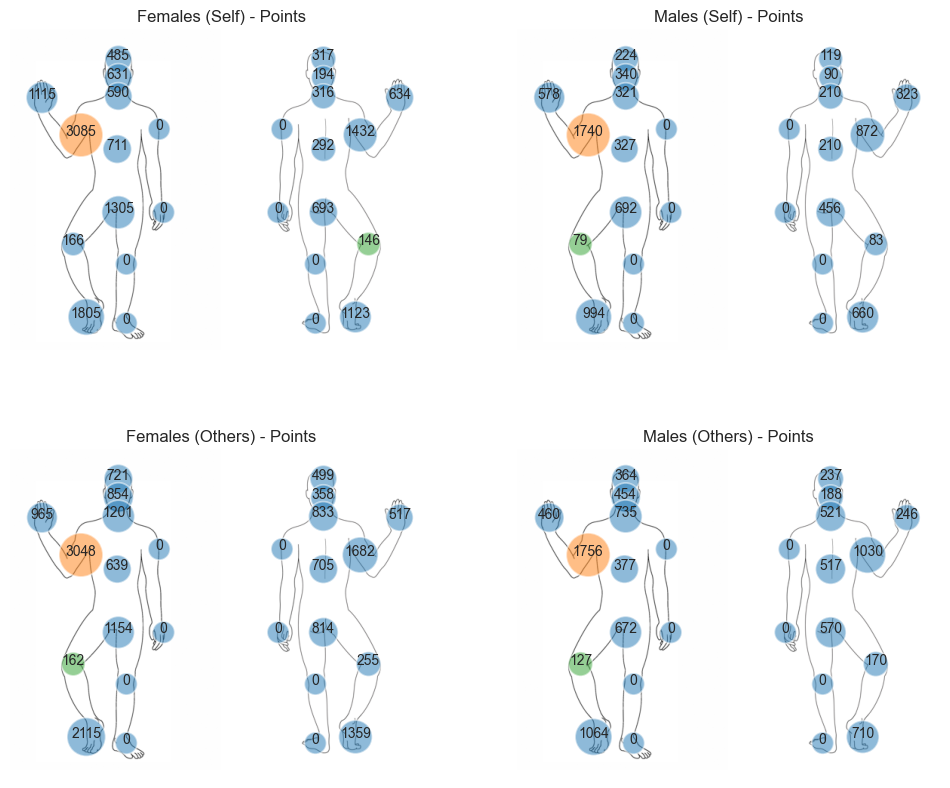

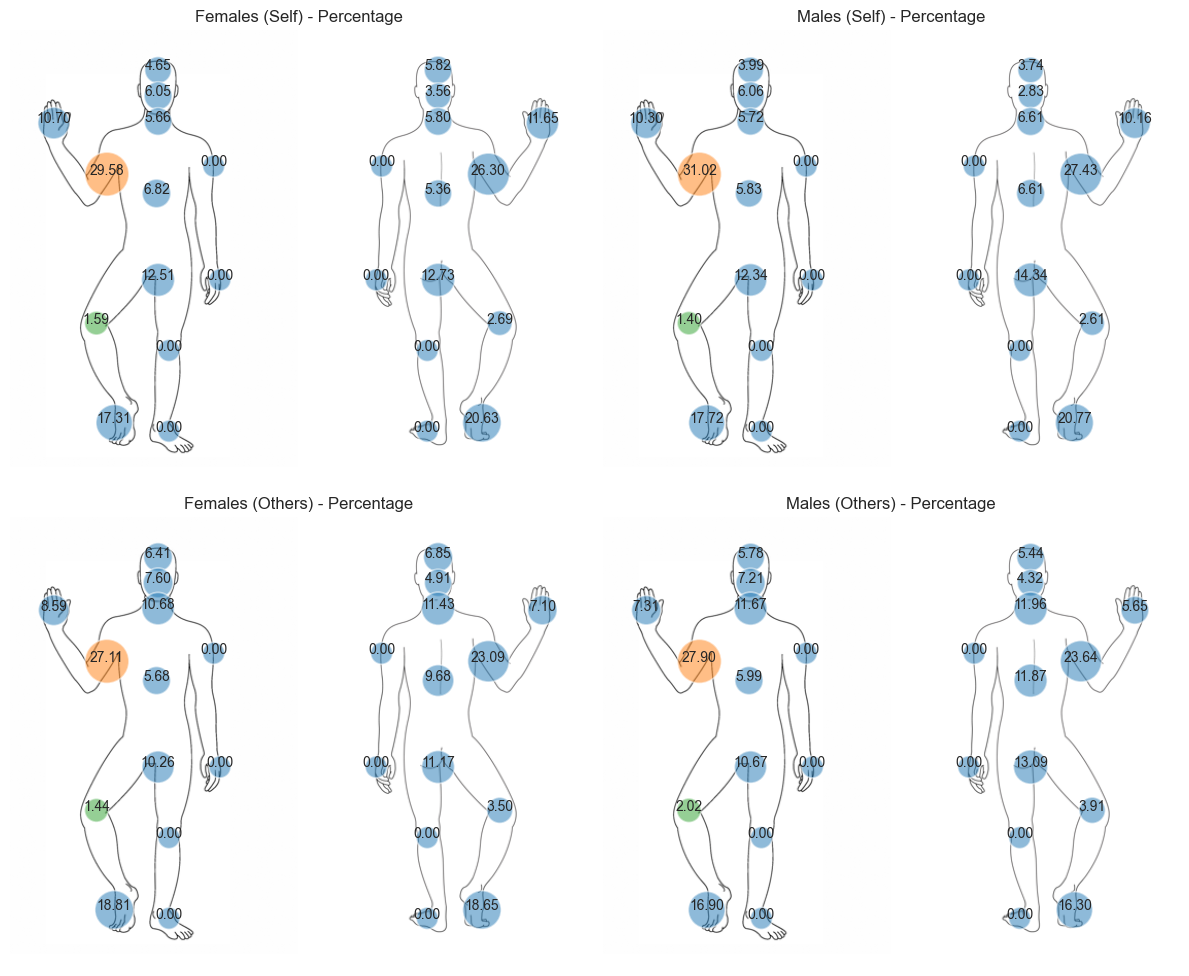

In [482]:
df_self1 = self_sex[self_sex['gender'] != 'male']
df_self2 = self_sex[self_sex['gender'] != 'female']
df_other1 = other_sex[other_sex['gender'] != 'male']
df_other2 = other_sex[other_sex['gender'] != 'female']

dfs = [df_self1, df_self2, df_other1, df_other2]

a = plot_sex(dfs, segments, segments_names, map_img)
# sort_and_export(dfs, segments, segments_names)